### Import Libraries

In [21]:
# General utilities
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import spacy # For advanced natural language processing tasks
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For label encoding categorical data

# Natural Language Processing (NLP) libraries
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text data
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.utils import to_categorical  # For one-hot encoding labels

# Model building
from tensorflow.keras.models import Sequential  # For creating sequential models
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, GlobalAveragePooling1D, Dropout,Flatten  # For building the neural network layers

from tensorflow.keras.optimizers import Adam  # For configuring the optimizer

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance

# Hyperparameter tuning
import kerastuner as kt  # For hyperparameter tuning using Keras Tuner

# Visualization
import matplotlib.pyplot as plt  # For plotting charts and graphs
import seaborn as sns  # For statistical data visualization

### Load Data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
print('Shape of the Dataset : ',df.shape)

Shape of the Dataset :  (50000, 2)


### Data Cleaning

In [5]:
df['sentiment'].value_counts() # we have 25000 datapoints of positive class sentiment and 25000 sentiment of negative class sentiment Total 50000 values we have. So We seen that this is balanced dataset

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
df.isnull().sum() # There is not any null values in dataset 

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum() # There is 418 duplicated values so we drop the duplicate values 

418

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
import pandas as pd
from bs4 import BeautifulSoup

def remove_html_tags(text):
    clean_text = BeautifulSoup(text,'html.parser').get_text(separator = ' ')
    return clean_text
# function that utilizes BeautifulSoup to remove HTML tags from a given text, making it suitable for processing text data containing HTML content

In [10]:
df['review'][1] # Before apply the function 

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [11]:
df['review'] = df['review'].apply(remove_html_tags) 

In [12]:
df['review'][1] # After Applying the function 

'A wonderful little production.  The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece.  The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life.  The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

### Text Preprocessing 

#### Tokenizing Using Spacy

In [15]:
# Loading the spaCy English language model 'en_core_web_sm' for natural language processing

nlp = spacy.load('en_core_web_sm')


def spacy_tokenizer(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens



In [16]:
spacy_tokenizer(df['review'][100]) # Tokenizing using spacy

['This',
 'short',
 'film',
 'that',
 'inspired',
 'the',
 'soon',
 '-',
 'to',
 '-',
 'be',
 'full',
 'length',
 'feature',
 '-',
 'Spatula',
 'Madness',
 '-',
 'is',
 'a',
 'hilarious',
 'piece',
 'that',
 'contends',
 'against',
 'similar',
 'cartoons',
 'yielding',
 'multiple',
 'writers',
 '.',
 'The',
 'short',
 'film',
 'stars',
 'Edward',
 'the',
 'Spatula',
 'who',
 'after',
 'being',
 'fired',
 'from',
 'his',
 'job',
 ',',
 'joins',
 'in',
 'the',
 'fight',
 'against',
 'the',
 'evil',
 'spoons',
 '.',
 'This',
 'premise',
 'allows',
 'for',
 'some',
 'funny',
 'content',
 'near',
 'the',
 'beginning',
 ',',
 'but',
 'is',
 'barely',
 'present',
 'for',
 'the',
 'remainder',
 'of',
 'the',
 'feature',
 '.',
 'This',
 'film',
 "'s",
 '15',
 '-',
 'minute',
 'running',
 'time',
 'is',
 'absorbed',
 'by',
 'some',
 'odd',
 '-',
 'ball',
 'comedy',
 'and',
 'a',
 'small',
 'musical',
 'number',
 '.',
 'Unfortunately',
 'not',
 'much',
 'else',
 'lies',
 'below',
 'it',
 '.',
 'T

In [15]:
df['review'] = df['review'].apply(spacy_tokenizer) # apply to all the series of review 

#### Remove Punctuation using spaCy

In [18]:
# Remove Punctuation from the Given Text data of movie reviews using spacy
def remove_punctuation_from_tokens(tokens):
    doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    tokens_without_punctuation = [token.text for token in doc if not token.is_punct]
    return tokens_without_punctuation

In [19]:
df['review'][0] # before removing punctuations 

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows

In [18]:
df['review'] = df['review'].apply(remove_punctuation_from_tokens) # applying the punctuation removing fuction to the review column with apply method

In [20]:
import nltk
from nltk import word_tokenize
def tokenize_using_nltk(text):
    tokens = word_tokenize(text)
    return tokens

In [26]:
df['review'] = df['review'].apply(tokenize_using_nltk)

In [21]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
def remove_punctuation_using_string(tokens):
    cleans = []
    for token in tokens:
        if token not in punctuation:
            cleans.append(token)
    return cleans

In [36]:
df['review'] = df['review'].apply(remove_punctuation_using_string)

In [38]:
df['review'] = df['review'].str.join(' ')

In [23]:
import re

def find_words_with_single_quote(text):
    # Pattern to find words attached with a single quotation mark
    pattern = r"\b\w+'\w*\b"
    
    # Apply the regex pattern to the input string
    matches = re.findall(pattern, text)
    
    return matches

In [24]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows

In [44]:
df.to_csv('imdb_review_preprocessed.csv',index=False) # Saving The Preprocessed Dataframe for further operations and use it 

#### Lemmatization Using Spacy

In [26]:
# The purpose of lemmatization is to transform words into their base or root forms, reducing them to a common base to capture their essential meaning. In natural language processing (NLP), lemmatization is often performed as part of text preprocessing to standardize word forms and improve the efficiency and accuracy of downstream tasks. It helps in tasks such as text analysis, sentiment analysis, and information retrieval where having a consistent representation of words is beneficial. 

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    result = ' '.join(lemmatized_tokens)
    return result

In [27]:
lemmatize_text(df['review'][0])

'one of the other reviewer have mention that after watch just 1 oz episode you will be hook . they be right , as this be exactly what happen with I . the first thing that strike I about Oz be its brutality and unflinche scene of violence , which set in right from the word GO . trust I , this be not a show for the faint hearted or timid . this show pull no punch with regard to drug , sex or violence . its be hardcore , in the classic use of the word . it be call OZ as that be the nickname give to the Oswald Maximum Security State Penitentary . it focus mainly on Emerald City , an experimental section of the prison where all the cell have glass front and face inward , so privacy be not high on the agenda . Em City be home to many .. aryan , Muslims , gangsta , Latinos , Christians , Italians , irish and more .... so scuffle , death stare , dodgy dealing and shady agreement be never far away . I would say the main appeal of the show be due to the fact that it go where other show would not

In [28]:
df = pd.read_csv('imdb_review_preprocessed.csv')
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there a family where a little boy ja...,negative
4,petter mattei love in the time of money is a v...,positive


In [29]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Text Data Analysis, Exploration and Visualisation 

In [30]:
# Extract positive reviews and join them into a single string
positives = ' '.join(df[df['sentiment'] == 'positive']['review'])

# Extract negative reviews and join them into a single string
negatives = ' '.join(df[df['sentiment'] == 'negative']['review'])

In [31]:
def stopword_remove_spacy(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if not token.is_stop]
    filtered_text = ' '.join(filtered_words)
    return filtered_text


In [32]:
df_tokens = pd.read_csv('imdb_movie_tokens.csv')
df_tokens.drop(columns=['Unnamed: 0'],inplace=True)

In [33]:
positives_class = ' '.join(df_tokens[df_tokens['sentiment'] == 'positive']['review'])
negatives_class = ' '.join(df_tokens[df_tokens['sentiment'] == 'negative']['review'])

#### Word Cloud for positives and negatives sentiments 

In [34]:
# Define a function to generate and display a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def wordcloudplot(text):
    wc = WordCloud(width=2000,height=800,
              background_color='white',min_font_size= 10)
    wc.generate(text)
    plt.figure(figsize=(10,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

##### WordCloud for Positives

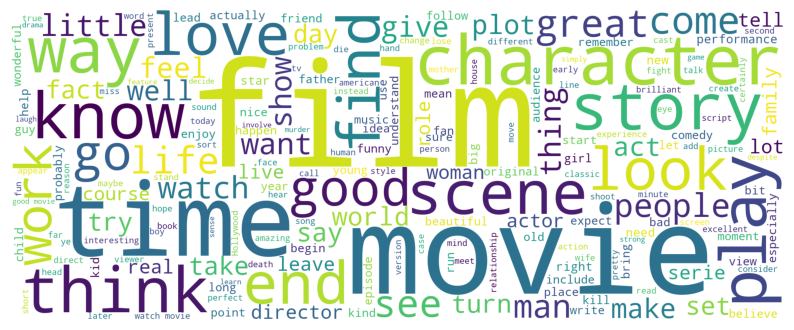

In [35]:
wordcloudplot(positives_class)

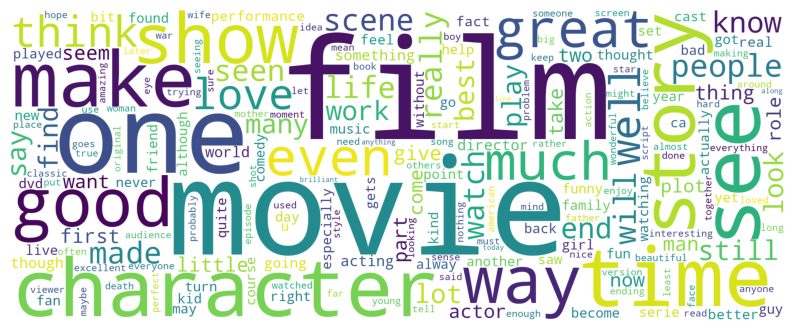

In [36]:
wordcloudplot(positives)

##### WordCloud for negatives

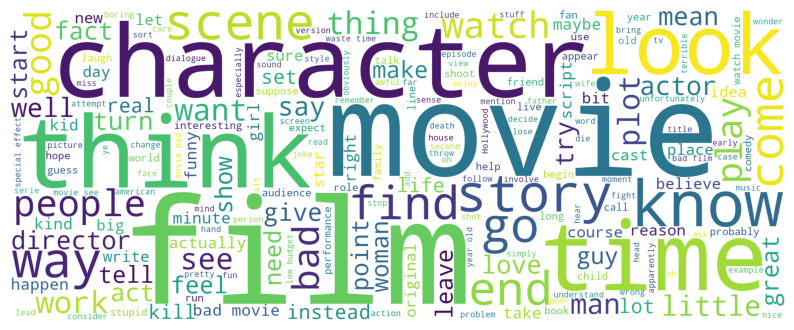

In [37]:
wordcloudplot(negatives_class)

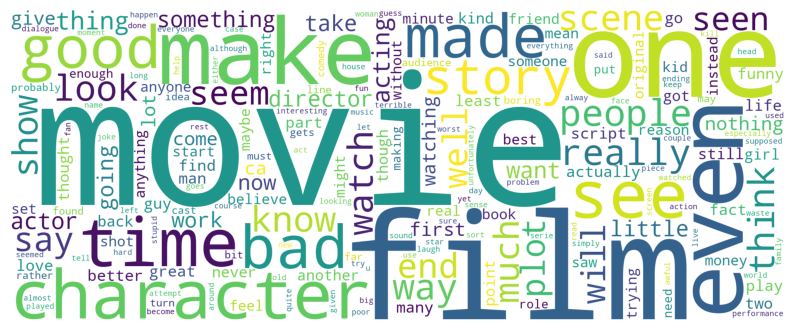

In [38]:
wordcloudplot(negatives)

#### Defining Text length of each Text Data point 

In [39]:
df['text_length'] = df['review'].apply(len)
df_tokens['text_length'] = df_tokens['review'].apply(len)

In [40]:
print('Text Without removing stopwords')
print('Maximum Length : ' , df['text_length'].max())
print('Minimum Length : ' ,df['text_length'].min())
print('Mean Length : ' ,df['text_length'].mean())
print('----------------------------------------------')
print('Text With removing stopwords')
print('Maximum Length : ' , df_tokens['text_length'].max())
print('Minimum Length : ' ,df_tokens['text_length'].min())
print('Mean Length : ' ,df_tokens['text_length'].mean())

Text Without removing stopwords
Maximum Length :  13306
Minimum Length :  30
Mean Length :  1252.0035295066757
----------------------------------------------
Text With removing stopwords
Maximum Length :  8018
Minimum Length :  17
Mean Length :  689.9512121334355


count    49582.000000
mean      1252.003530
std        946.031804
min         30.000000
25%        671.000000
50%        929.000000
75%       1518.000000
max      13306.000000
Name: text_length, dtype: float64
******************************************************


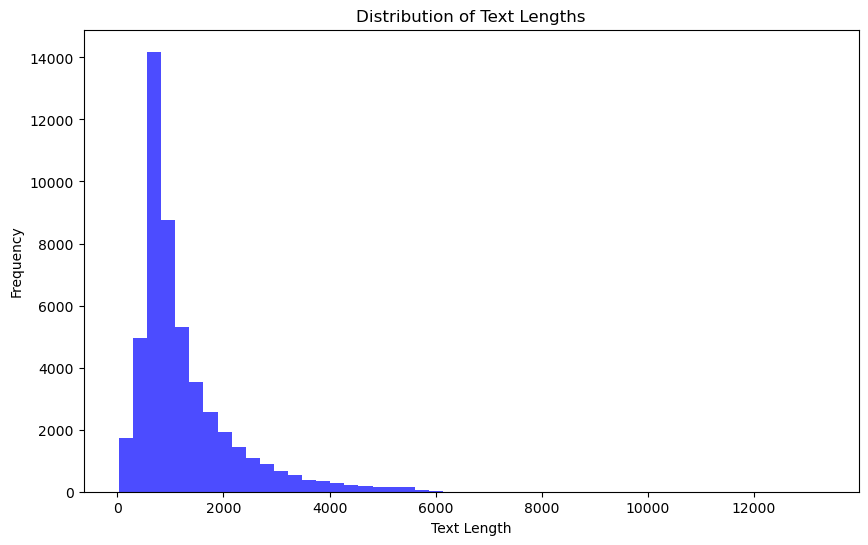

******************************************************
count    49582.000000
mean       689.951212
std        544.189831
min         17.000000
25%        353.000000
50%        503.500000
75%        842.000000
max       8018.000000
Name: text_length, dtype: float64
******************************************************


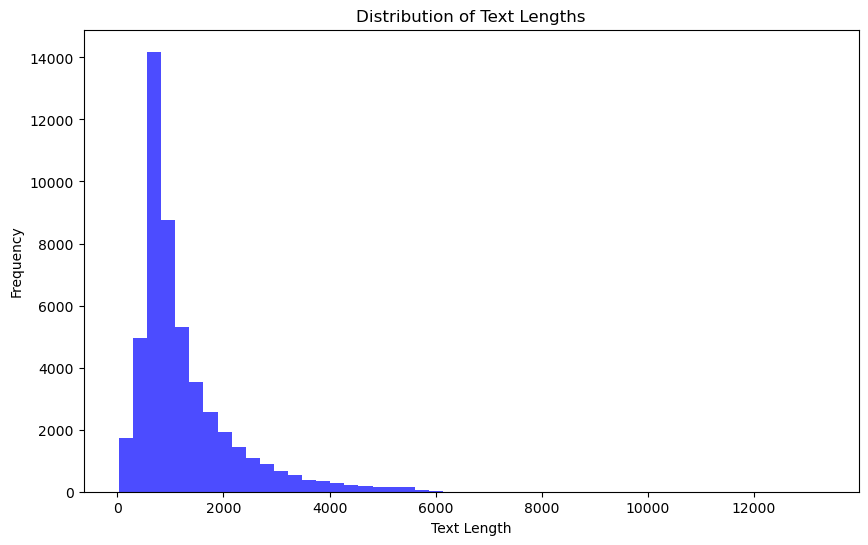

In [41]:
# Display basic statistics of text lengths
print(df['text_length'].describe())
print('******************************************************')

# Visualize the distribution of text lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

print('******************************************************')

print(df_tokens['text_length'].describe())
print('******************************************************')

# Visualize the distribution of text lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Defining number of words present in the text data

In [43]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split())) # number of words each text data point 
df_tokens['word_count'] = df_tokens['review'].apply(lambda x: len(str(x).split())) # number of words each text data point 

In [44]:
print('Maximum number of words :',df['word_count'].max())
print('Minimum number of words :',df['word_count'].min())
print('Mean number of words :',df['word_count'].mean())
print('--------------------------------------------------------------------')

print('Maximum number of words :',df_tokens['word_count'].max())
print('Minimum number of words :',df_tokens['word_count'].min())
print('Mean number of words :',df_tokens['word_count'].mean())

Maximum number of words : 2479
Minimum number of words : 6
Mean number of words : 233.02942600137146
--------------------------------------------------------------------
Maximum number of words : 1299
Minimum number of words : 2
Mean number of words : 103.2612036626195


word count for text without removing stopword
count    49582.000000
mean       233.029426
std        172.253679
min          6.000000
25%        128.000000
50%        175.000000
75%        283.000000
max       2479.000000
Name: word_count, dtype: float64


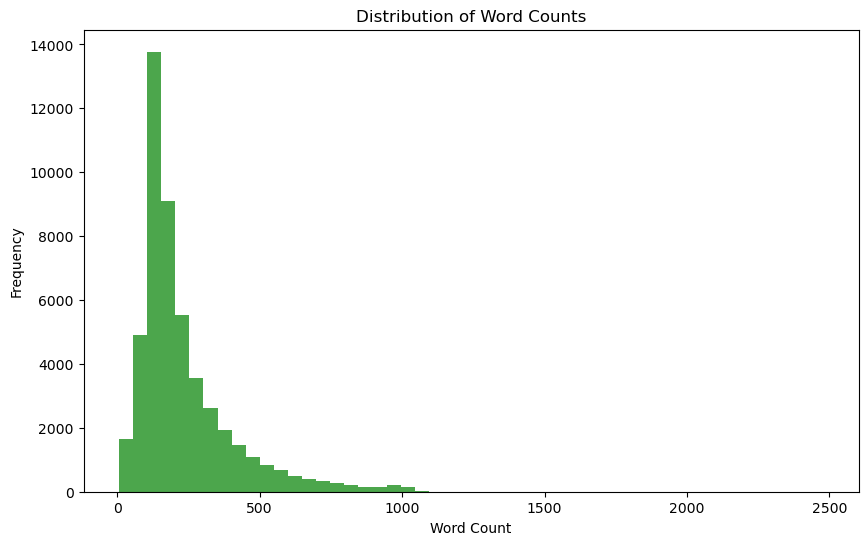

--------------------------------------------------------------------
word count for text with removing stopword
count    49582.000000
mean       103.261204
std         79.198280
min          2.000000
25%         54.000000
50%         76.000000
75%        126.000000
max       1299.000000
Name: word_count, dtype: float64


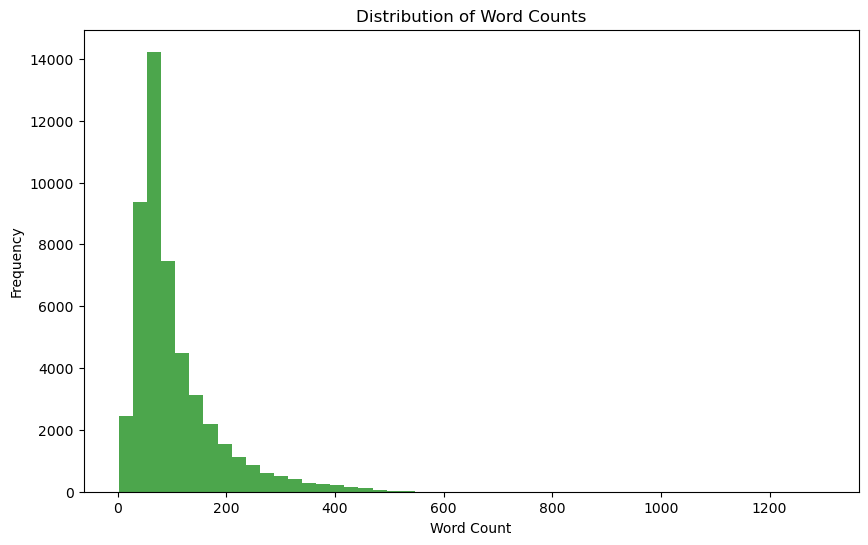

In [45]:
print('word count for text without removing stopword')
print(df['word_count'].describe())

# Visualize the distribution of word counts using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

print('--------------------------------------------------------------------')

print('word count for text with removing stopword')
print(df_tokens['word_count'].describe())

# Visualize the distribution of word counts using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_tokens['word_count'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In our dataset, a substantial majority of text data points exhibit a word count ranging from approximately 25 to 100 words and exhibit text-length of 400 to 800 characters indicating that the content of most entries falls within this intermediate range of text length.


In [46]:
df['review'] = df['review'].str.lower()

#### Frequency Distribution and analysis of Words 

In [47]:
positives_tokens = positives.split()
negatives_tokens = negatives.split()
positives_class_tokens = positives_class.split()
negatives_class_tokens = negatives_class.split()

In [48]:
import nltk
from nltk import FreqDist

In [96]:
pos_dist = FreqDist(positives_tokens) 
neg_dist = FreqDist(negatives_tokens)

pos_cdist = FreqDist(positives_class_tokens) 
neg_cdist = FreqDist(negatives_class_tokens)

In [99]:
print('The words Most number of times occurs in positive sentiment ')
pos_cdist

The words Most number of times occurs in positive sentiment 


FreqDist({'film': 49800, 'movie': 43829, 'good': 21048, 'like': 19917, 'time': 15509, 'character': 13812, 'story': 13726, 'great': 13686, 'see': 12703, 'watch': 12201, ...})

In [100]:
print('The words Most number of times occurs in negative sentiment')

neg_cdist

The words Most number of times occurs in negative sentiment


FreqDist({'movie': 56819, 'film': 43837, 'like': 23815, 'bad': 20437, 'good': 17419, 'time': 14278, 'watch': 14072, 'character': 13972, 'think': 11597, 'see': 11394, ...})

In [101]:
# Display the most common words
print('\nPositive text\n',pos_cdist.most_common(50))
print('\nNegative text\n',neg_cdist.most_common(50))


Positive text
 [('film', 49800), ('movie', 43829), ('good', 21048), ('like', 19917), ('time', 15509), ('character', 13812), ('story', 13726), ('great', 13686), ('see', 12703), ('watch', 12201), ('love', 10942), ('think', 10903), ('scene', 9926), ('play', 9700), ('know', 9277), ('end', 8775), ('way', 8689), ('find', 8535), ('people', 8323), ('life', 8262), ('come', 8052), ('look', 7955), ('man', 7596), ('year', 7581), ('go', 7471), ('work', 7430), ('make', 7079), ('thing', 6857), ('get', 6481), ('little', 6151), ('well', 6099), ('actor', 6098), ('performance', 5941), ('want', 5904), ('feel', 5842), ('act', 5628), ('take', 5487), ('give', 5477), ('show', 5369), ('role', 5084), ('plot', 5016), ('real', 5005), ('old', 4956), ('lot', 4916), ('young', 4726), ('try', 4632), ('cast', 4606), ('bad', 4357), ('tell', 4261), ('live', 4253)]

Negative text
 [('movie', 56819), ('film', 43837), ('like', 23815), ('bad', 20437), ('good', 17419), ('time', 14278), ('watch', 14072), ('character', 13972),

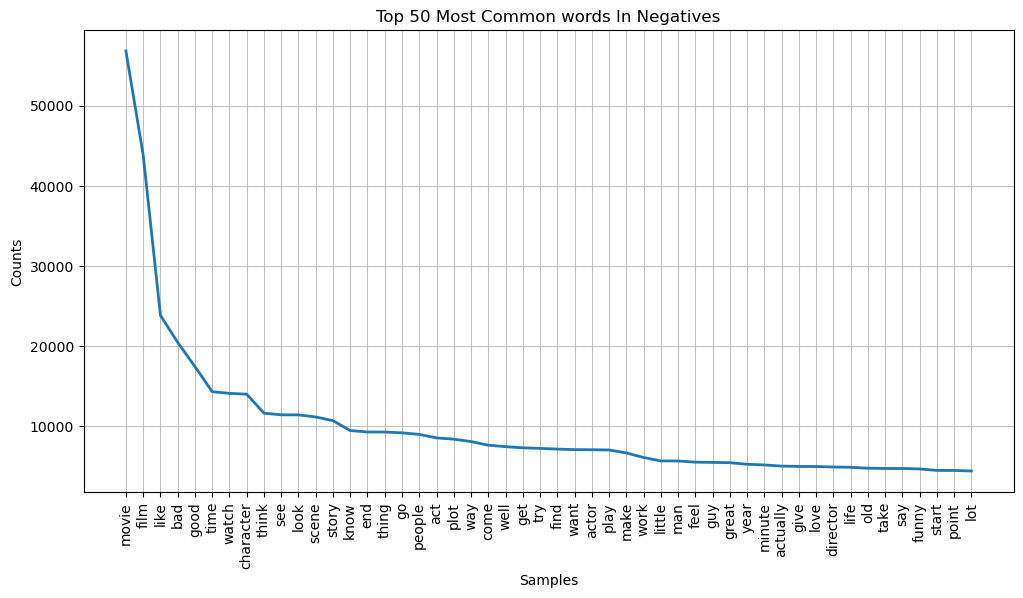

In [102]:
# Visualize word frequencies using a bar chart from positive class
plt.figure(figsize=(12, 6))
plt.title('Top 50 Most Common words In Negatives')
plt.xlabel('Words')
plt.ylabel('Frequency')
neg_cdist.plot(50, cumulative=False)

plt.show()

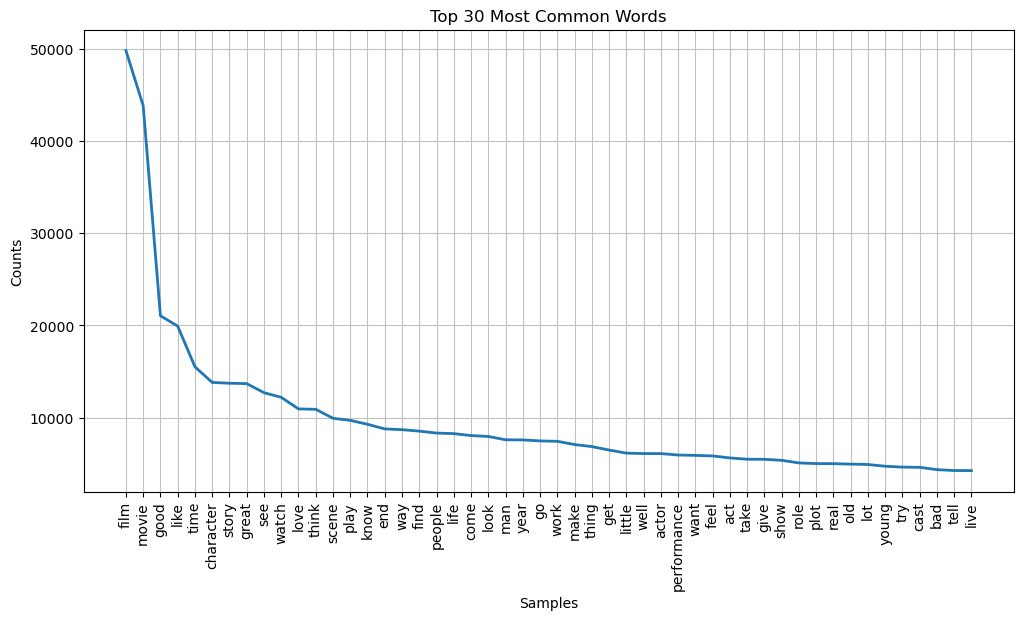

In [103]:
# Visualize word frequencies using a bar chart from positive class
plt.figure(figsize=(12, 6))
plt.title('Top 30 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
pos_cdist.plot(50, cumulative=False)

plt.show()

In [104]:
print(len(positives_tokens))
print(len(negatives_tokens))

5834065
5720000


In [105]:
pseries = pd.Series(positives_tokens)
nseries = pd.Series(negatives_tokens)

In [109]:
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i laughed at one of woody comedies in years dare i say a decade while i have never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

In [110]:
import spacy

nlp = spacy.load("en_core_web_sm")


doc = nlp(df['review'][200])

entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities)


[('jay leno', 'PERSON'), ('carson', 'PERSON'), ('tonight', 'TIME'), ('conan brien', 'ORG'), ('jay leno', 'PERSON'), ('nbc', 'ORG')]


In [111]:
# Process the text with spaCy NLP pipeline
doc = nlp(df['review'][2])

pos_tags = [(token.text, token.pos_) for token in doc]
print(pos_tags)


[('i', 'PRON'), ('thought', 'VERB'), ('this', 'PRON'), ('was', 'AUX'), ('a', 'DET'), ('wonderful', 'ADJ'), ('way', 'NOUN'), ('to', 'PART'), ('spend', 'VERB'), ('time', 'NOUN'), ('on', 'ADP'), ('a', 'DET'), ('too', 'ADV'), ('hot', 'ADJ'), ('summer', 'NOUN'), ('weekend', 'NOUN'), ('sitting', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('air', 'NOUN'), ('conditioned', 'VERB'), ('theater', 'NOUN'), ('and', 'CCONJ'), ('watching', 'VERB'), ('a', 'DET'), ('light', 'ADJ'), ('hearted', 'ADJ'), ('comedy', 'NOUN'), ('the', 'DET'), ('plot', 'NOUN'), ('is', 'AUX'), ('simplistic', 'ADJ'), ('but', 'CCONJ'), ('the', 'DET'), ('dialogue', 'NOUN'), ('is', 'AUX'), ('witty', 'ADJ'), ('and', 'CCONJ'), ('the', 'DET'), ('characters', 'NOUN'), ('are', 'AUX'), ('likable', 'ADJ'), ('even', 'ADV'), ('the', 'DET'), ('well', 'ADJ'), ('bread', 'NOUN'), ('suspected', 'VERB'), ('serial', 'ADJ'), ('killer', 'NOUN'), ('while', 'SCONJ'), ('some', 'PRON'), ('may', 'AUX'), ('be', 'AUX'), ('disappointed', 'VERB'), ('when', 'SCO

In [81]:
def remove_named_entities(text):
    doc = nlp(text)
    processed_text = ' '.join([token.text for token in doc if not token.ent_type_])
    
    return processed_text

In [113]:
df.to_csv('movie_clean.csv')

### Model Selection 

In [1]:
import pandas as pd
df = pd.read_csv('movie_clean.csv')

In [2]:
from sklearn.model_selection import train_test_split # for Spliting The dataframe import model-selection 

In [3]:
X = df['review'] # features
y = df['sentiment'] # labels

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Engineering

#### Label Encoding for Target Variables

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [6]:
# Performing label encoding for target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#### One-Hot Encoding for Categorical Labels

In [7]:
num_classes = y_train.nunique()

In [8]:
# Performing one-hot encoding for categorical labels
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded,num_classes=num_classes)

#### Text Vectorization using CountVectorizer

In [9]:
# Transforming text data into numerical features using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english') # Initialize CountVectorizer with English stopwords removal

In [10]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv  = cv.transform(X_test)

#### Convert to Array Matrix

In [11]:
chunk_size = 1000  # Adjust the chunk size based on your available memory
num_rows, num_cols = X_train_cv.shape
X_train_cv_array = np.empty((num_rows, num_cols), dtype=np.float16)

for i in range(0, num_rows, chunk_size):
    end_idx = min(i + chunk_size, num_rows)
    X_train_cv_array[i:end_idx, :] = X_train_cv[i:end_idx, :].toarray().astype(np.float16)

In [12]:
chunk_size = 1000  # Adjust the chunk size based on your available memory
num_rows, num_cols = X_test_cv.shape
X_test_cv_array = np.empty((num_rows, num_cols), dtype=np.float16)

for i in range(0, num_rows, chunk_size):
    end_idx = min(i + chunk_size, num_rows)
    X_test_cv_array[i:end_idx, :] = X_test_cv[i:end_idx, :].toarray().astype(np.float16)

In [13]:
print(X_train_cv_array.shape,X_test_cv_array.dtype)
print(X_test_cv_array.shape,X_test_cv_array.dtype)

(39665, 92470) float16
(9917, 92470) float16


In [14]:
feature_names = cv.get_feature_names_out()

# Sum the counts for each word across all documents
word_frequencies = X_train_cv.sum(axis=0)

# Create a dictionary mapping words to their frequencies
word_frequency_dict = dict(zip(feature_names, word_frequencies.flat))

# Print the word frequencies
word_frequency_dict = pd.Series(word_frequency_dict)


In [15]:
top_words = pd.DataFrame(sorted(word_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:50], columns=['Word', 'Frequency'])

print('\nMost Appeared Words in Data with their frequency\n')
print(top_words)


Most Appeared Words in Data with their frequency

          Word  Frequency
0        movie      70204
1         film      63264
2         like      31777
3         just      27860
4         good      23754
5         time      19752
6        story      18292
7       really      18153
8          did      16947
9         does      16257
10         bad      14681
11       great      14465
12      people      14435
13        make      12624
14         way      12344
15      movies      12143
16       think      11481
17  characters      11362
18   character      11063
19       watch      11061
20       films      10900
21        seen      10562
22        plot      10308
23        life      10245
24      acting      10238
25        love      10173
26        best      10035
27        know       9919
28      little       9885
29         man       9512
30      better       9088
31         end       8845
32       scene       8759
33         say       8524
34      scenes       8476
35        rea

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_regressor = DecisionTreeClassifier()

In [18]:
dt_regressor.fit(X_train_cv,y_train_encoded)

DecisionTreeClassifier()

In [19]:
dt_prediction = dt_regressor.predict(X_test_cv)

In [22]:
print('Accuracy Score of The Model : ',accuracy_score(y_test_encoded,dt_prediction))
print('\nClassification Report :  \n\n',classification_report(y_test_encoded,dt_prediction))
print('\nConfusion Matrix  : \n')
confusion_matrix(y_test_encoded,dt_prediction)

Accuracy Score of The Model :  0.7217908641726328

Classification Report :  

               precision    recall  f1-score   support

           0       0.72      0.72      0.72      4939
           1       0.72      0.73      0.72      4978

    accuracy                           0.72      9917
   macro avg       0.72      0.72      0.72      9917
weighted avg       0.72      0.72      0.72      9917


Confusion Matrix  : 



array([[3540, 1399],
       [1360, 3618]], dtype=int64)

#### Text Vectorization using TfidfVectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Transforming text data into numerical features using TfidfVectorizer
tfv = TfidfVectorizer(stop_words='english') # Initialize TfidfVectorizer with English stopwords removal

In [25]:
X_train_tfv =  tfv.fit_transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [26]:
chunk_size = 1000  # Adjust the chunk size based on your available memory
num_rows, num_cols = X_train_tfv.shape
X_train_tfv_array = np.empty((num_rows, num_cols), dtype=np.float16)

for i in range(0, num_rows, chunk_size):
    end_idx = min(i + chunk_size, num_rows)
    X_train_tfv_array[i:end_idx, :] = X_train_tfv[i:end_idx, :].toarray().astype(np.float16)


In [27]:
chunk_size = 1000  # Adjust the chunk size based on your available memory
num_rows, num_cols = X_test_tfv.shape
X_test_tfv_array = np.empty((num_rows, num_cols), dtype=np.float16)

for i in range(0, num_rows, chunk_size):
    end_idx = min(i + chunk_size, num_rows)
    X_test_tfv_array[i:end_idx, :] = X_test_tfv[i:end_idx, :].toarray().astype(np.float16)

In [28]:
print(X_train_tfv_array.shape)
print(X_test_tfv_array.shape)

(39665, 92470)
(9917, 92470)


In [29]:
dt_regressor_tfv = DecisionTreeClassifier()

In [30]:
dt_regressor_tfv.fit(X_train_tfv,y_train_encoded)

DecisionTreeClassifier()

In [31]:
tfv_pred = dt_regressor_tfv.predict(X_test_tfv)

In [32]:
print('Accuracy Score of The Model : ',accuracy_score(y_test_encoded,tfv_pred))
print('\nClassification Report :  \n\n',classification_report(y_test_encoded,tfv_pred))
print('\nConfusion Matrix  : \n')
confusion_matrix(y_test_encoded,tfv_pred)

Accuracy Score of The Model :  0.7148331148532823

Classification Report :  

               precision    recall  f1-score   support

           0       0.71      0.71      0.71      4939
           1       0.72      0.72      0.72      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917


Confusion Matrix  : 



array([[3519, 1420],
       [1408, 3570]], dtype=int64)

### Text Tokenization using Keras Tokenizer

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [34]:
tokenizer = Tokenizer() # Create a Tokenizer instance

In [35]:
tokenizer.fit_on_texts(X_train) # Fitting Keras Tokenizer on the training text data

In [36]:
vocabulary = tokenizer.index_word # vocabulary of tokens

In [37]:
vocabulary_length = len(vocabulary) # vocabulary length
vocabulary_length

93484

##### Word Counts , Word Frequecy

In [38]:
word_counts = tokenizer.word_counts
word_counts_series = pd.Series(word_counts)
# Print the  Top word counts
print(word_counts_series.sort_values(ascending=False).head(20))

the      530525
and      257428
a        256127
of       230264
to       212599
is       172934
it       151519
in       148506
i        139396
this     120047
that     114570
not      102344
was       79439
as        73050
movie     70197
for       69318
with      69256
but       66081
film      63258
you       54592
dtype: int64


##### Document count 

In [39]:
# Access the document count
document_count = tokenizer.document_count

# Print the document count
print('Document Count : ',document_count)

Document Count :  39665


Tokenizing training text data using the fitted Keras Tokenizer

In [40]:
X_train_sequence = tokenizer.texts_to_sequences(X_train)

Computing Document Lengths from Tokenized Sequences

In [41]:
doc_length = []
for sequences in X_train_sequence:
    doc_length.append(len(sequences))

Analyzing quantiles of document lengths in the training data


In [42]:
print('50  -  ',np.quantile(doc_length,0.50),39665*0.50)
print('75  -  ',np.quantile(doc_length,0.75),39665*0.75)
print('80  -  ',np.quantile(doc_length,0.80),39665*0.80)
print('90  -  ',np.quantile(doc_length,0.90),39665*0.90)
print('92  -  ',np.quantile(doc_length,0.92),39665*0.92)
print('94  -  ',np.quantile(doc_length,0.94),39665*0.94)
print('95  -  ',np.quantile(doc_length,0.95),39665*0.95)
print('98  -  ',np.quantile(doc_length,0.98),39665*0.98)
print('95  -  ',np.quantile(doc_length,0.95),39665*0.95)
print('97  -  ',np.quantile(doc_length,0.97),39665*0.97)
print('99  -  ',np.quantile(doc_length,0.99),39665*0.99)
print('100  -  ',np.quantile(doc_length,1.0),39665*1.0)

50  -   175.0 19832.5
75  -   284.0 29748.75
80  -   322.0 31732.0
90  -   455.0 35698.5
92  -   498.88000000000466 36491.8
94  -   558.0 37285.1
95  -   593.0 37681.75
98  -   784.0 38871.7
95  -   593.0 37681.75
97  -   702.0 38475.049999999996
99  -   910.0 39268.35
100  -   2260.0 39665.0


In [43]:
print('Maximum Length of The Document : ',np.array(doc_length).max())

Maximum Length of The Document :  2260


In [44]:
max_length = 600 # WE Decided to set Maximum length 600 That Cover out 95 % of Data

#### Padding Tokenized Sequences for Uniform Length

In [45]:
# Padding tokenized sequences for uniform length in the training data
X_train_matrix = sequence.pad_sequences(X_train_sequence,maxlen=max_length)
X_train_matrix

array([[    0,     0,     0, ...,   341,   196,   127],
       [    0,     0,     0, ...,  4263,     2,  2689],
       [    0,     0,     0, ...,    12,    23,   190],
       ...,
       [    0,     0,     0, ...,     3,   438,   151],
       [    0,     0,     0, ...,   125,  6935, 15337],
       [    0,     0,     0, ...,     4,     1,  2828]])

In [47]:
X_test_sequence = tokenizer.texts_to_sequences(X_test)

In [48]:
X_test_matrix = sequence.pad_sequences(X_test_sequence,maxlen=max_length)
X_test_matrix

array([[   0,    0,    0, ...,  850,  224,  151],
       [   0,    0,    0, ...,   36,   10,   26],
       [   1,   19,  395, ...,    1, 3997, 2787],
       ...,
       [   0,    0,    0, ...,    7,   67, 1026],
       [   0,    0,    0, ...,    1,  297,  309],
       [   0,    0,    0, ...,   83,   14,  643]])

In [49]:
print(X_train_matrix.shape)
print(X_test_matrix.shape)

(39665, 600)
(9917, 600)


### Model Training 

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten,SimpleRNN,Bidirectional,LSTM,GRU
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#### Neural Network 

In [207]:
modelnn = Sequential()
modelnn.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 64, input_length = max_length,
         mask_zero = True))
modelnn.add(Flatten())
modelnn.add(Dense(64, activation='relu'))
modelnn.add(Dense(32, activation='relu'))
modelnn.add(Dense(16, activation='relu'))
modelnn.add(Dense(1, activation='sigmoid'))

modelnn.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
modelnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 64)           5983040   
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 64)                2457664   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,443,329
Trainable params: 8,443,329
Non-

Applying Callbacks To Monitor Performance of Model Saving The Best Weights 

In [208]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_path = "modelnn.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [210]:
historynn = modelnn.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Epoch 1/20
1240/1240 [==============================] - ETA: 0s - loss: 0.3387 - accuracy: 0.8434
Epoch 1: val_loss improved from inf to 0.25392, saving model to modelnn.h5
1240/1240 [==============================] - 187s 149ms/step - loss: 0.3387 - accuracy: 0.8434 - val_loss: 0.2539 - val_accuracy: 0.8972
Epoch 2/20
1240/1240 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9793
Epoch 2: val_loss did not improve from 0.25392
1240/1240 [==============================] - 185s 149ms/step - loss: 0.0617 - accuracy: 0.9793 - val_loss: 0.3384 - val_accuracy: 0.8827
Epoch 3/20
1240/1240 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9972
Epoch 3: val_loss did not improve from 0.25392
1240/1240 [==============================] - 182s 147ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.5642 - val_accuracy: 0.8694
Epoch 4/20
1240/1240 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9966
Epoch 4: val_loss did not im

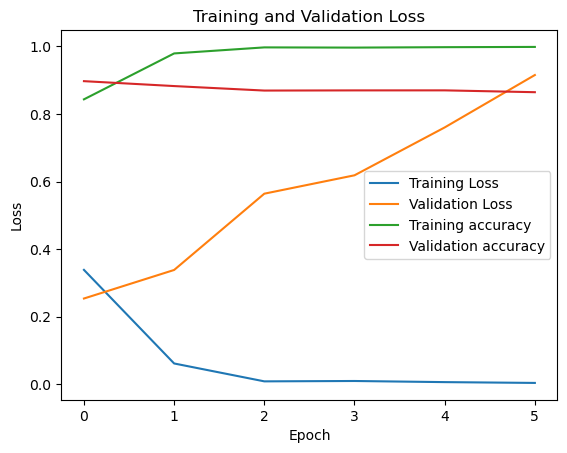

In [214]:
# Plot the training and validation loss
plt.plot(historynn.history['loss'], label='Training Loss')
plt.plot(historynn.history['val_loss'], label='Validation Loss')
plt.plot(historynn.history['accuracy'], label='Training accuracy')
plt.plot(historynn.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [215]:
nn_pred = modelnn.predict(X_test_matrix)

310/310 [==============================] - 3s 9ms/step


In [216]:
nn_result = np.where(nn_pred >= 0.5, 1,0)

In [47]:
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve,accuracy_score,r2_score,classification_report,confusion_matrix

In [230]:
print('Performance Of The Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,nn_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,nn_result))
auc_roc = roc_auc_score(y_test_encoded, nn_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, nn_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

Performance Of The Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.90      0.89      0.90      4939
           1       0.89      0.91      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917


Confusion Matrix : 

 [[4391  548]
 [ 471 4507]]

AUC-ROC Score :  0.9610483942670285

precision recall curve :  0.9613957287651272


#### Recurrent Neural Network (RNN)

In [233]:
model_srnn = Sequential()
model_srnn.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 100, input_length = max_length,
         mask_zero = True))
model_srnn.add(SimpleRNN(64))
model_srnn.add(Dense(32, activation='relu'))
model_srnn.add(Dense(16, activation='relu'))
model_srnn.add(Dense(1, activation='sigmoid'))

model_srnn.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
model_srnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 100)          9348500   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,361,685
Trainable params: 9,361,685
Non-trainable params: 0
_________________________________________________________________


In [234]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_path = "model_srnn.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [235]:
history_srnn = model_srnn.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Epoch 1/20
1240/1240 [==============================] - ETA: 0s - loss: 0.6269 - accuracy: 0.6358
Epoch 1: val_loss improved from inf to 0.56536, saving model to model_srnn.h5
1240/1240 [==============================] - 2528s 2s/step - loss: 0.6269 - accuracy: 0.6358 - val_loss: 0.5654 - val_accuracy: 0.7109
Epoch 2/20
1240/1240 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.7493
Epoch 2: val_loss did not improve from 0.56536
1240/1240 [==============================] - 534s 431ms/step - loss: 0.5077 - accuracy: 0.7493 - val_loss: 0.5990 - val_accuracy: 0.6662
Epoch 3/20
1240/1240 [==============================] - ETA: 0s - loss: 0.4661 - accuracy: 0.7806
Epoch 3: val_loss improved from 0.56536 to 0.56459, saving model to model_srnn.h5
1240/1240 [==============================] - 536s 432ms/step - loss: 0.4661 - accuracy: 0.7806 - val_loss: 0.5646 - val_accuracy: 0.7073
Epoch 4/20
1240/1240 [==============================] - ETA: 0s - loss: 0.3767 - accuracy:

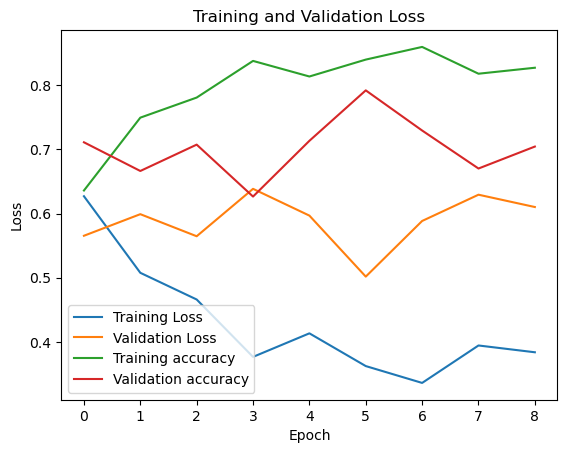

In [236]:
# Plot the training and validation loss
plt.plot(history_srnn.history['loss'], label='Training Loss')
plt.plot(history_srnn.history['val_loss'], label='Validation Loss')
plt.plot(history_srnn.history['accuracy'], label='Training accuracy')
plt.plot(history_srnn.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [237]:
srnn_pred = model_srnn.predict(X_test_matrix)

310/310 [==============================] - 11s 33ms/step


In [238]:
srnn_result = np.where(srnn_pred >= 0.5, 1,0)

In [239]:
print('Performance Of The Simple Recurrent Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,srnn_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,srnn_result))
auc_roc = roc_auc_score(y_test_encoded, srnn_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, srnn_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

Performance Of The Simple Recurrent Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.80      0.78      0.79      4939
           1       0.79      0.80      0.79      4978

    accuracy                           0.79      9917
   macro avg       0.79      0.79      0.79      9917
weighted avg       0.79      0.79      0.79      9917


Confusion Matrix : 

 [[3869 1070]
 [ 995 3983]]

AUC-ROC Score :  0.8678681847018967

precision recall curve :  0.8644595364275496


#### Multilayer RNN

In [41]:
model_mrnn = Sequential()
model_mrnn.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 100, input_length = max_length,
         mask_zero = True))
model_mrnn.add(SimpleRNN(64,return_sequences=True))
model_mrnn.add(SimpleRNN(64))
model_mrnn.add(Dense(32, activation='relu'))
model_mrnn.add(Dense(32, activation='relu'))
model_mrnn.add(Dense(16, activation='relu'))
model_mrnn.add(Dense(1, activation='sigmoid'))

model_mrnn.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
model_mrnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 100)          9348500   
                                                                 
 simple_rnn (SimpleRNN)      (None, 600, 64)           10560     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [42]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_path = "model_mrnn.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [43]:
history_mrnn = model_mrnn.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Epoch 1/20
1240/1240 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.4959
Epoch 1: val_loss improved from inf to 0.69380, saving model to model_mrnn.h5
1240/1240 [==============================] - 565s 454ms/step - loss: 0.6950 - accuracy: 0.4959 - val_loss: 0.6938 - val_accuracy: 0.4926
Epoch 2/20
1240/1240 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4980
Epoch 2: val_loss improved from 0.69380 to 0.69334, saving model to model_mrnn.h5
1240/1240 [==============================] - 538s 434ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 3/20
1240/1240 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5002
Epoch 3: val_loss improved from 0.69334 to 0.69320, saving model to model_mrnn.h5
1240/1240 [==============================] - 688s 555ms/step - loss: 0.6933 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 4/20
1240/1240 [==============================]

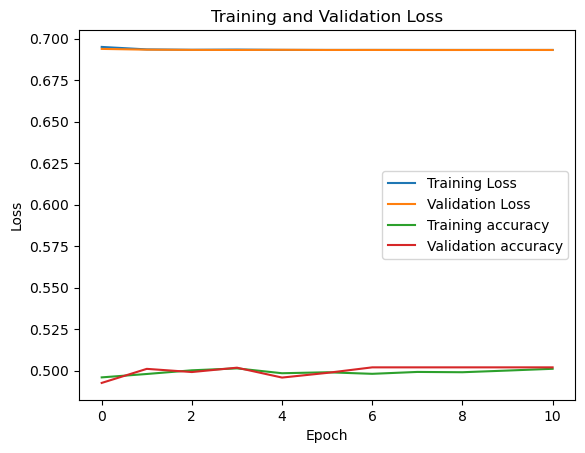

In [44]:
# Plot the training and validation loss
plt.plot(history_mrnn.history['loss'], label='Training Loss')
plt.plot(history_mrnn.history['val_loss'], label='Validation Loss')
plt.plot(history_mrnn.history['accuracy'], label='Training accuracy')
plt.plot(history_mrnn.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
mrnn_pred = model_mrnn.predict(X_test_matrix)
mrnn_result = np.where(mrnn_pred >= 0.5, 1,0)
print('Performance Of The Simple Recurrent Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,mrnn_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,mrnn_result))
auc_roc = roc_auc_score(y_test_encoded, mrnn_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, mrnn_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

310/310 [==============================] - 25s 81ms/step
Performance Of The Simple Recurrent Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4939
           1       0.50      1.00      0.67      4978

    accuracy                           0.50      9917
   macro avg       0.25      0.50      0.33      9917
weighted avg       0.25      0.50      0.34      9917


Confusion Matrix : 

 [[   0 4939]
 [   0 4978]]

AUC-ROC Score :  0.5

precision recall curve :  0.7509831602299082


#### Bidirectional RNN

In [49]:
model_brnn = Sequential()
model_brnn.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 100, input_length = max_length,
         mask_zero = True))
model_brnn.add(Bidirectional(SimpleRNN(64)))
model_brnn.add(Dense(32, activation='relu'))
model_brnn.add(Dense(16, activation='relu'))
model_brnn.add(Dense(1, activation='sigmoid'))

model_brnn.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
model_brnn.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint_path = "model_brnn.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history_brnn = model_brnn.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 100)          9348500   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              21120     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,374,293
Trainable params: 9,374,293
Non-trainable params: 0
____________________________________________

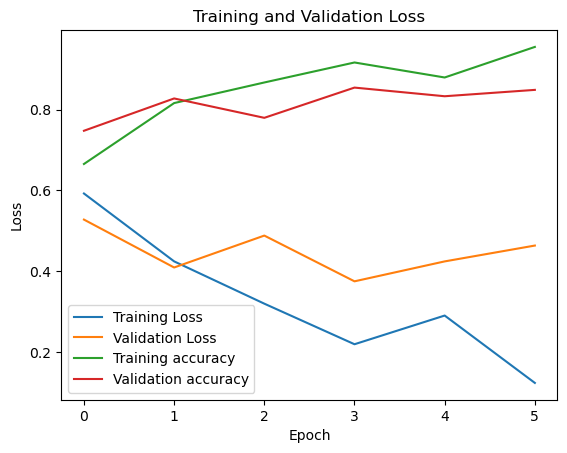

310/310 [==============================] - 16s 52ms/step
Performance Of The Simple Recurrent Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4939
           1       0.85      0.87      0.86      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917


Confusion Matrix : 

 [[4160  779]
 [ 667 4311]]

AUC-ROC Score :  0.9255659097233742

precision recall curve :  0.9239218227451096


In [52]:
# Plot the training and validation loss
plt.plot(history_brnn.history['loss'], label='Training Loss')
plt.plot(history_brnn.history['val_loss'], label='Validation Loss')
plt.plot(history_brnn.history['accuracy'], label='Training accuracy')
plt.plot(history_brnn.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

brnn_pred = model_brnn.predict(X_test_matrix)
brnn_result = np.where(brnn_pred >= 0.5, 1,0)
print('Performance Of The Simple Recurrent Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,brnn_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,brnn_result))
auc_roc = roc_auc_score(y_test_encoded, brnn_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, brnn_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

#### Long Short Term Memory (LSTM)

In [53]:
#### LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 100, input_length = max_length,
         mask_zero = True))
model_lstm.add((LSTM(64)))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(16, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
model_lstm.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_path = "model_lstm.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history_lstm = model_lstm.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 600, 100)          9348500   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,393,365
Trainable params: 9,393,365
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1240/1240 [======================

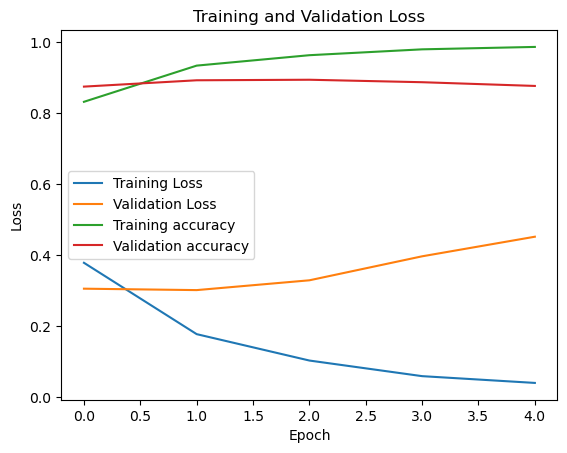

310/310 [==============================] - 64s 198ms/step
Performance Of LSTM Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.87      0.92      0.90      4939
           1       0.91      0.87      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917


Confusion Matrix : 

 [[4537  402]
 [ 658 4320]]

AUC-ROC Score :  0.9562550419253096

precision recall curve :  0.9582143773472228


In [60]:
# Plot the training and validation loss
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.plot(history_lstm.history['accuracy'], label='Training accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

lstm_pred = model_lstm.predict(X_test_matrix)
lstm_result = np.where(lstm_pred >= 0.5, 1,0)
print('Performance Of LSTM Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,lstm_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,lstm_result))
auc_roc = roc_auc_score(y_test_encoded, lstm_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, lstm_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

#### Multilayer LSTM

In [54]:
#### LSTM
model_mlstm = Sequential()
model_mlstm.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 100, input_length = max_length,
         mask_zero = True))
model_mlstm.add((LSTM(64,return_sequences=True)))
model_mlstm.add((LSTM(64)))
model_mlstm.add(Dense(32, activation='relu'))
model_mlstm.add(Dense(16, activation='relu'))
model_mlstm.add(Dense(1, activation='sigmoid'))

model_mlstm.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
model_mlstm.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint_path = "model_mlstm.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history_mlstm = model_mlstm.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 100)          9348500   
                                                                 
 lstm_1 (LSTM)               (None, 600, 64)           42240     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,426,389
Trainable params: 9,426,389
No

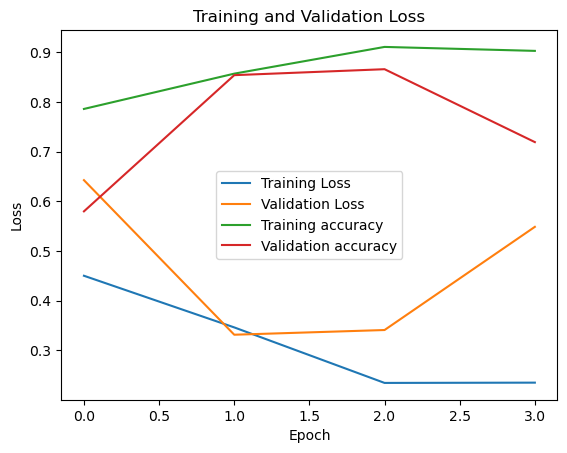

310/310 [==============================] - 126s 391ms/step
Performance Of LSTM Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4939
           1       0.84      0.87      0.86      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917


Confusion Matrix : 

 [[4120  819]
 [ 627 4351]]

AUC-ROC Score :  0.9334212059687448

precision recall curve :  0.9582143773472228


In [61]:
# Plot the training and validation loss
plt.plot(history_mlstm.history['loss'], label='Training Loss')
plt.plot(history_mlstm.history['val_loss'], label='Validation Loss')
plt.plot(history_mlstm.history['accuracy'], label='Training accuracy')
plt.plot(history_mlstm.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

mlstm_pred = model_mlstm.predict(X_test_matrix)
mlstm_result = np.where(mlstm_pred >= 0.5, 1,0)
print('Performance Of LSTM Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,mlstm_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,mlstm_result))
auc_roc = roc_auc_score(y_test_encoded, mlstm_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, lstm_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

#### GRU

In [57]:
#### LSTM
model_gru = Sequential()
model_gru.add(Embedding(input_dim = vocabulary_length+1,
         output_dim = 100, input_length = max_length,
         mask_zero = True))
model_gru.add((GRU(64)))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(16, activation='relu'))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy']) 
model_gru.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint_path = "model_gru.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history_gru = model_gru.fit(X_train_matrix,y_train_encoded,epochs=20,validation_data=(X_test_matrix,y_test_encoded),callbacks=[early_stopping,model_checkpoint])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 600, 100)          9348500   
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,382,997
Trainable params: 9,382,997
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1240/1240 [======================

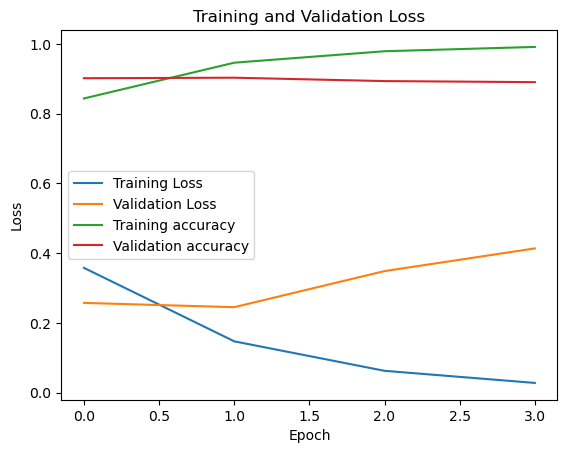

310/310 [==============================] - 46s 142ms/step
Performance Of LSTM Neural Network Model : 


Classification Report : 

               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4939
           1       0.89      0.92      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917


Confusion Matrix : 

 [[4364  575]
 [ 389 4589]]

AUC-ROC Score :  0.9646544817443766

precision recall curve :  0.9648987962516107


In [62]:
# Plot the training and validation loss
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.plot(history_gru.history['accuracy'], label='Training accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

gru_pred = model_gru.predict(X_test_matrix)
gru_result = np.where(gru_pred >= 0.5, 1,0)
print('Performance Of LSTM Neural Network Model : \n')
print('\nClassification Report : \n\n',classification_report(y_test_encoded,gru_result))
print('\nConfusion Matrix : \n\n' , confusion_matrix(y_test_encoded,gru_result))
auc_roc = roc_auc_score(y_test_encoded, gru_pred)

print("\nAUC-ROC Score : ", auc_roc)
precision, recall, _ = precision_recall_curve(y_test_encoded, gru_pred)
auc_pr = auc(recall, precision)
print('\nprecision recall curve : ',auc_pr)

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model_gru = load_model('model_gru.h5')

In [55]:
def Prediction(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    tokens_without_stopword = [token.text for token in doc if not token.is_stop and not token.is_punct]
    texts = [' '.join(tokens_without_stopword)]  # Convert the string into a list of text
    sequence_text = tokenizer.texts_to_sequences(texts)
    sequence_padded = sequence.pad_sequences(sequence_text, maxlen = max_length)
    prediction = model_gru.predict(sequence_padded)
    result = np.where(prediction >= 0.5, 'Positive','Negative')
    return result


In [56]:
Prediction("The movie was a complete disappointment. The plot was weak, the characters were one-dimensional, and the acting was subpar. I had high expectations, but it failed to deliver on every front. The pacing was slow, and I found myself bored throughout. The so-called at the end was predictable and uninspiring. I wouldn't recommend wasting your time on this film")
           


1/1 [==============================] - 8s 8s/step


array([['Negative']], dtype='<U8')

In [57]:
Prediction(X_test[29035])

1/1 [==============================] - 0s 209ms/step


array([['Negative']], dtype='<U8')

In [60]:
def check(number):
    text = X_test[number]
    senti = y_test[number]
    pred = Prediction(text)[0][0]
    return pred, senti

In [61]:
check(X_test.sample().index.values[0])

1/1 [==============================] - 0s 146ms/step


('Negative', 'negative')